# Mesothelioma Related Deaths in England (1968-2021)

## The Dataset

In [48]:
import pandas as pd
import numpy as np

# Reading the dataset and storing at variable meso_deaths
meso_deaths = pd.read_csv('./dataset/Mesothelioma_Deaths_in_England_1968_2021.csv')
display(meso_deaths.head())

,Year,GSS ID,Region,Gender,Mesothelioma Death Recorded
0,1968,E12000001,North East,Male,11
1,1969,E12000001,North East,Male,9
2,1970,E12000001,North East,Male,14
3,1971,E12000001,North East,Male,9
4,1972,E12000001,North East,Male,18


Note: the data in the dataset is already well inserted - thanks to Kaggle -, so there will be no need for dropping null values or treating NaN, for example

In [49]:
# Copying the dataset to X so it can be used without modifying the original one
X = meso_deaths.copy()

# Getting the target into y
y = X.pop('Mesothelioma Death Recorded')

In [50]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

# Separating categorical features from numerical features
features_cat = ['GSS ID', 'Region', 'Gender']
features_num = ['Year']

# Preprocessing
preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
    (OneHotEncoder(), features_cat),
)

# Splitting the data into test and train
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=0)

# Using preprocessor
X_train = preprocessor.fit_transform(X_train).toarray()
X_valid = preprocessor.transform(X_valid).toarray()

# Getting the input_shape
input_shape = [X_train.shape[1]]
print(X_train.shape)

(453, 21)


## The Model

#### Making a linear model and plotting its results

Minimum Validation Loss: 44.0043


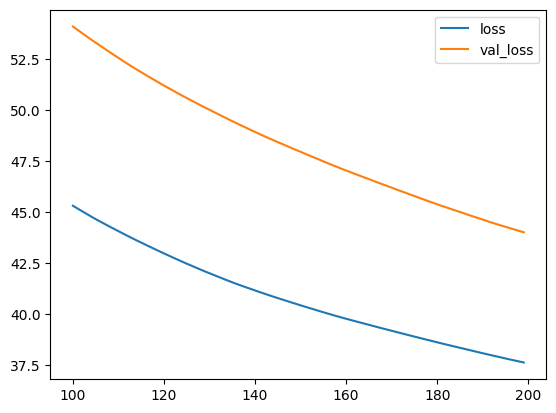

In [56]:
from tensorflow import keras
from tensorflow.keras import layers

# Creating the model
model = keras.Sequential([
    layers.Dense(1, input_shape=input_shape)
])

# Compiling the model - adam algorithm for optimizer and mae (mean absolute error) for loss value
model.compile(
    optimizer='adam',
    loss='mae',
)

# fitting the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=2,
    epochs=200,
    verbose=0
)

# Creating a DataFrame with history so it can be plottable
history_df = pd.DataFrame(history.history) # the model saves the history into history

# Plots the graph for loss and validation loss
history_df.loc[100:, ['loss', 'val_loss']].plot()

# Prints the minimuim achieved for validation loss so the analyses of underfitting or overfitting can be done
print('Minimum Validation Loss: {:0.4f}'.format(history_df['val_loss'].min()))

The curves are with a big gap between them and the loss validation curve is above the loss curve. It can be a symptom of overfitting, so let's try with more capacity - e.g adding more layers to the model.

Epoch 1/50
227/227 [==============================] - 2s 5ms/step - loss: 53.6755 - val_loss: 35.8181
Epoch 2/50
227/227 [==============================] - 1s 4ms/step - loss: 22.6590 - val_loss: 19.2412
Epoch 3/50
227/227 [==============================] - 1s 4ms/step - loss: 15.7538 - val_loss: 16.0115
Epoch 4/50
227/227 [==============================] - 1s 3ms/step - loss: 13.3692 - val_loss: 14.3132
Epoch 5/50
227/227 [==============================] - 1s 3ms/step - loss: 12.0439 - val_loss: 13.4454
Epoch 6/50
227/227 [==============================] - 1s 3ms/step - loss: 11.0552 - val_loss: 12.5258
Epoch 7/50
227/227 [==============================] - 1s 4ms/step - loss: 10.3643 - val_loss: 11.5348
Epoch 8/50
227/227 [==============================] - 1s 3ms/step - loss: 9.6158 - val_loss: 11.1186
Epoch 9/50
227/227 [==============================] - 1s 5ms/step - loss: 9.5686 - val_loss: 11.8150
Epoch 10/50
227/227 [==============================] - 1s 3ms/step - loss: 8.9785 - 

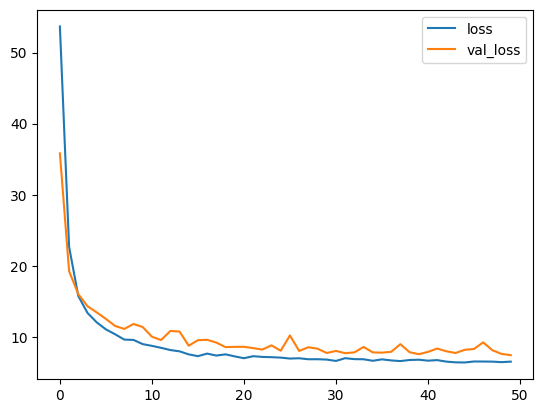

In [60]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mae'
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=2,
    epochs=50
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print('Minimum Validtaion Loss: {:0.4f}'.format(history_df['val_loss'].min()))

Turns out that the model did pretty well with this setup, the validation loss curve maintains itself above the loss curve, and pretty close. I good thing to implement here would be an Early Stopping. 

In [61]:
from tensorflow.keras import callbacks

# Defining an Early Stopping - it will detect when the loss start to grow again and stop the trainig by there.
early_stopping = callbacks.EarlyStopping(min_delta=0.001, patience=5, restore_best_weights=True)

Epoch 1/50
227/227 [==============================] - 2s 4ms/step - loss: 55.7281 - val_loss: 38.1797
Epoch 2/50
227/227 [==============================] - 1s 3ms/step - loss: 23.1732 - val_loss: 19.6929
Epoch 3/50
227/227 [==============================] - 1s 3ms/step - loss: 15.9230 - val_loss: 16.6697
Epoch 4/50
227/227 [==============================] - 1s 4ms/step - loss: 13.6155 - val_loss: 15.2669
Epoch 5/50
227/227 [==============================] - 1s 3ms/step - loss: 12.2485 - val_loss: 14.0708
Epoch 6/50
227/227 [==============================] - 1s 3ms/step - loss: 11.6525 - val_loss: 13.0419
Epoch 7/50
227/227 [==============================] - 1s 3ms/step - loss: 10.7458 - val_loss: 12.0812
Epoch 8/50
227/227 [==============================] - 1s 4ms/step - loss: 10.2654 - val_loss: 11.9678
Epoch 9/50
227/227 [==============================] - 1s 3ms/step - loss: 9.9181 - val_loss: 11.2082
Epoch 10/50
227/227 [==============================] - 1s 3ms/step - loss: 9.2712 -

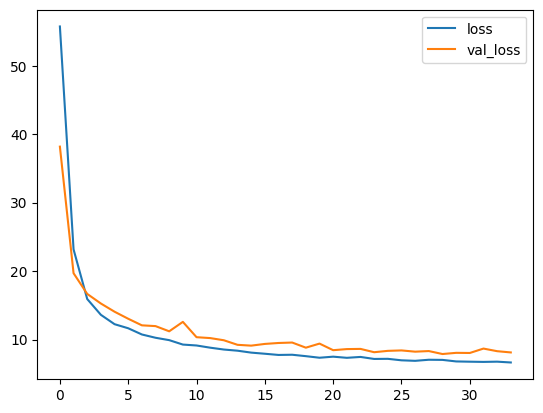

In [64]:
# Creating the model with the Early Stopping
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mae'
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=2,
    epochs=50,
    callbacks=[early_stopping]
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print('Minimum Valiation Loss: {:0.4f}'.format(history_df['val_loss'].min()))

Adding more capacity to see what happens:

- making the model wider

Epoch 1/50
227/227 [==============================] - 2s 6ms/step - loss: 47.3911 - val_loss: 24.7605
Epoch 2/50
227/227 [==============================] - 1s 4ms/step - loss: 16.9389 - val_loss: 15.4079
Epoch 3/50
227/227 [==============================] - 1s 4ms/step - loss: 13.1101 - val_loss: 13.6689
Epoch 4/50
227/227 [==============================] - 1s 4ms/step - loss: 11.1543 - val_loss: 12.5832
Epoch 5/50
227/227 [==============================] - 1s 4ms/step - loss: 10.5708 - val_loss: 11.2110
Epoch 6/50
227/227 [==============================] - 1s 4ms/step - loss: 10.0026 - val_loss: 10.5721
Epoch 7/50
227/227 [==============================] - 1s 4ms/step - loss: 9.0154 - val_loss: 10.5265
Epoch 8/50
227/227 [==============================] - 1s 4ms/step - loss: 8.7929 - val_loss: 9.6381
Epoch 9/50
227/227 [==============================] - 1s 4ms/step - loss: 8.1798 - val_loss: 9.2678
Epoch 10/50
227/227 [==============================] - 1s 4ms/step - loss: 8.2706 - val

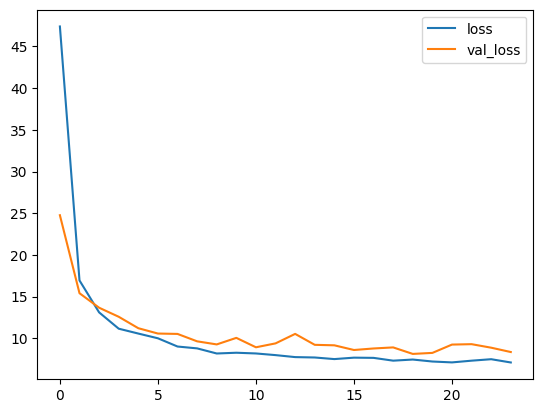

In [65]:
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mae'
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=2,
    epochs=50,
    callbacks=[early_stopping]
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print('Minimum Valiation Loss: {:0.4f}'.format(history_df['val_loss'].min()))

The Minimum Valdation Loss increased. Maybe that is not a good path to follow

- making the model deeper

Epoch 1/50
227/227 [==============================] - 3s 7ms/step - loss: 45.0750 - val_loss: 23.5932
Epoch 2/50
227/227 [==============================] - 1s 5ms/step - loss: 15.2338 - val_loss: 14.5267
Epoch 3/50
227/227 [==============================] - 2s 7ms/step - loss: 11.5602 - val_loss: 14.3813
Epoch 4/50
227/227 [==============================] - 1s 6ms/step - loss: 10.3455 - val_loss: 10.8399
Epoch 5/50
227/227 [==============================] - 2s 7ms/step - loss: 9.2759 - val_loss: 10.2920
Epoch 6/50
227/227 [==============================] - 2s 7ms/step - loss: 8.7929 - val_loss: 9.6875
Epoch 7/50
227/227 [==============================] - 2s 8ms/step - loss: 8.6204 - val_loss: 9.1769
Epoch 8/50
227/227 [==============================] - 1s 6ms/step - loss: 7.9419 - val_loss: 9.8906
Epoch 9/50
227/227 [==============================] - 2s 7ms/step - loss: 8.2769 - val_loss: 8.9403
Epoch 10/50
227/227 [==============================] - 1s 5ms/step - loss: 8.1360 - val_los

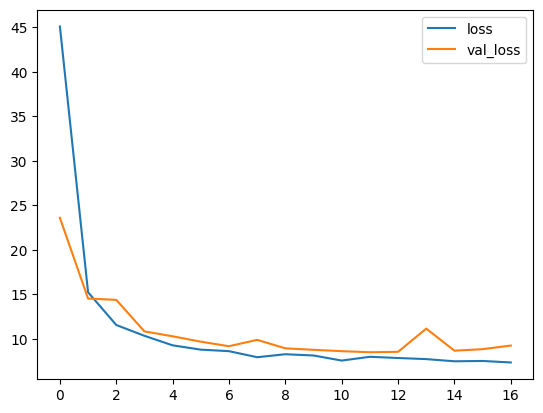

In [67]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mae'
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=2,
    epochs=50,
    callbacks=[early_stopping]
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print('Minimum Valiation Loss: {:0.4f}'.format(history_df['val_loss'].min()))

Again, the Minimum Validation Loss increased.

## Conclusion

For this dataset - by the way, a small one - the best result was to make a model with 3 hidden layers and to not use the Ealy Stopping. However, the values in both loss and validation loss were kind of high.
<br /><br />I think that there might be two reasons for that: 
<br />1 - the size of the dataset influences here too. 
<br />2 - the activation functions and the number of neurons were not the best things to use here.
<br />
<br />
Feel free on trying to improve the model! :)